In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [48]:
# Load the data
df = pd.read_csv("KDD.csv")
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [49]:
# Separate input features (X) and target variable (Y)
X = df.drop("target", axis=1)
Y = df["target"]

# Normalize input features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Apply filter-based feature selection to reduce the number of features to 10
selector = SelectKBest(f_classif, k=9)
X = selector.fit_transform(X, Y)
X = pd.DataFrame(X)

# Add the target variable back to the dataset
my_data = pd.concat([X, Y], axis=1)

# Show the first five rows of the final dataset
my_data.head()



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,0,1,2,3,4,5,6,7,8,target
0,1.0,0.015656,0.015656,0.0,1.0,0.0,0.035294,0.11,0.0,0
1,1.0,0.015656,0.015656,0.0,1.0,0.0,0.074510,0.05,0.0,0
2,1.0,0.015656,0.015656,0.0,1.0,0.0,0.113725,0.03,0.0,0
3,1.0,0.011742,0.011742,0.0,1.0,0.0,0.152941,0.03,0.0,0
4,1.0,0.011742,0.011742,0.0,1.0,0.0,0.192157,0.02,0.0,0


# b)

In [50]:

# (b) Split my data into train and test sets and evaluate decision tree performance
train1, test1 = train_test_split(my_data, test_size=0.3, random_state=42)
train2, test2 = train_test_split(my_data, test_size=0.4, random_state=42)
train3, test3 = train_test_split(my_data, test_size=0.5, random_state=42)
for i, (train, test) in enumerate([(train1, test1), (train2, test2), (train3, test3)], start=1):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]
    dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
    dt.fit(X_train, Y_train)
    Y_train_pred = dt.predict(X_train)
    Y_test_pred = dt.predict(X_test)
    print(f"Results for my data {i}")
    print("Classification report for train:\n", classification_report(Y_train, Y_train_pred))
    print("Classification report for test:\n", classification_report(Y_test, Y_test_pred))

Results for my data 1
Classification report for train:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     68086
           1       1.00      0.99      1.00    277728

    accuracy                           0.99    345814
   macro avg       0.98      0.99      0.99    345814
weighted avg       0.99      0.99      0.99    345814

Classification report for test:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207

Results for my data 2
Classification report for train:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     58301
           1       1.00      0.99      1.00    238111

    accuracy                         

# C)

Classification report for my_data_1 with max_depth=4:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29192
           1       1.00      0.98      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207




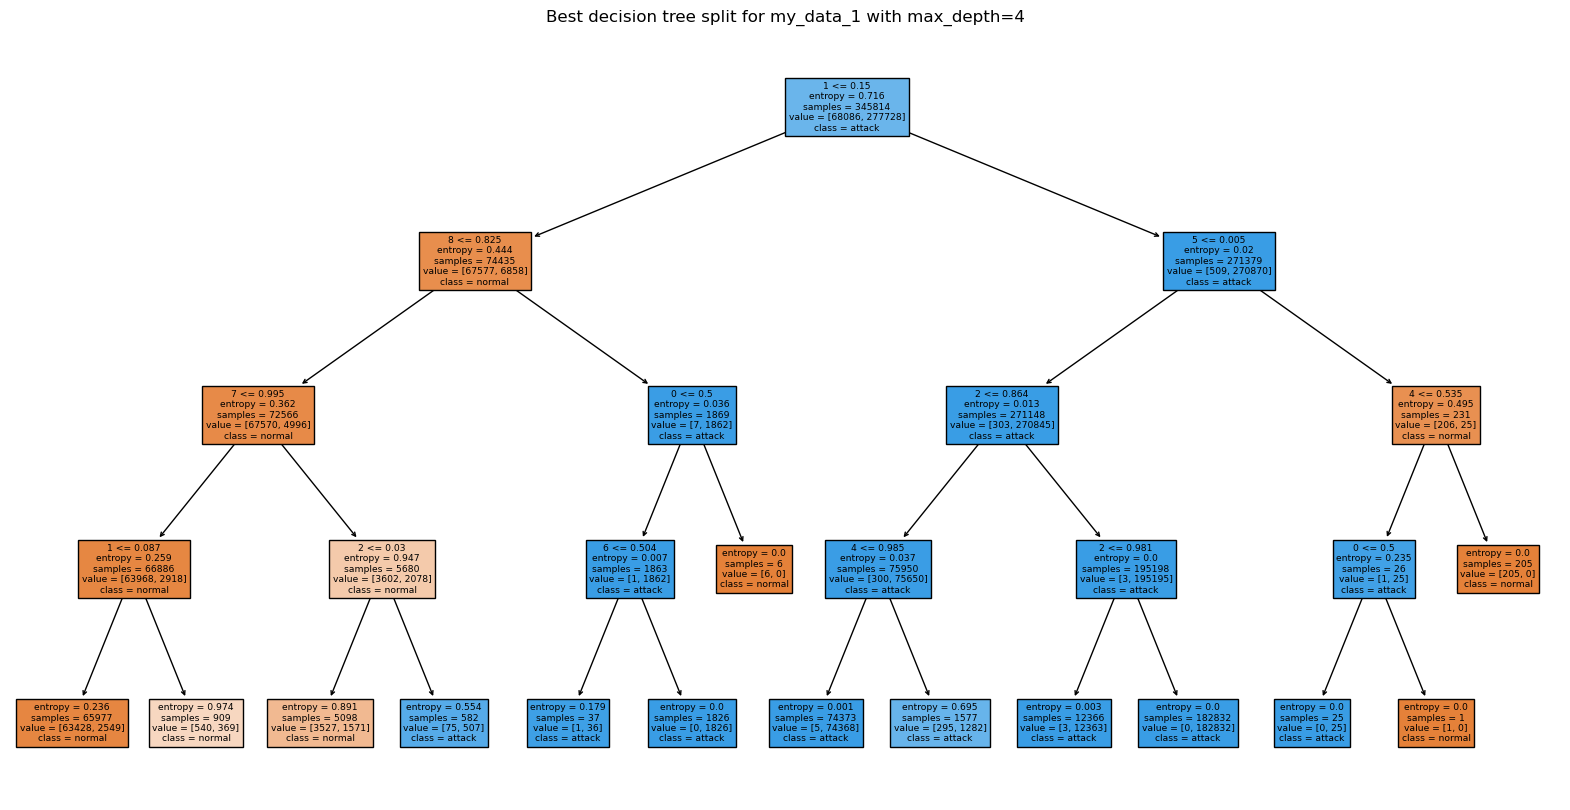

Classification report for my_data_1 with max_depth=6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207




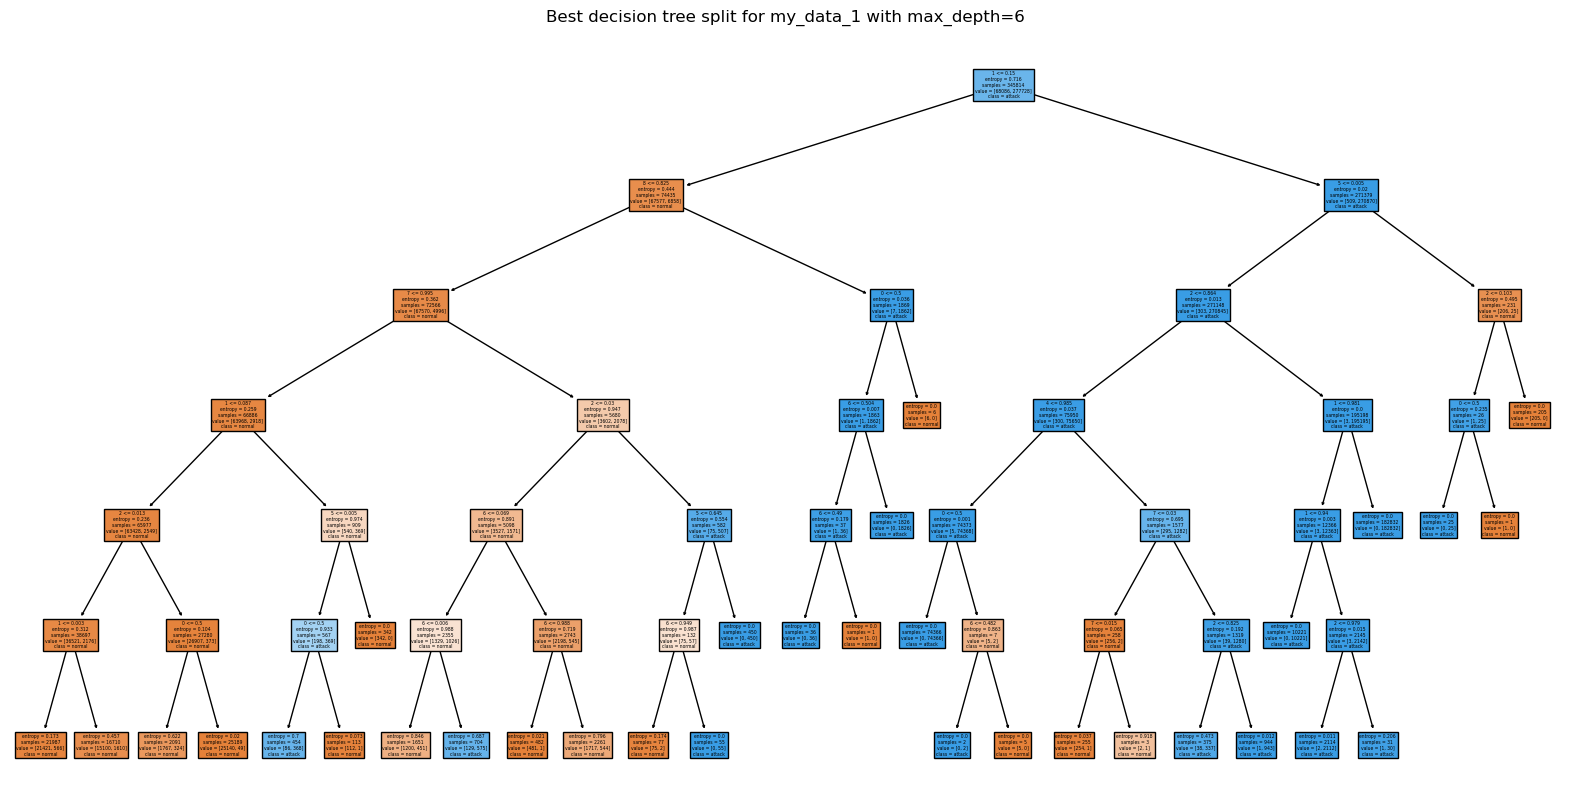

Classification report for my_data_1 with max_depth=8:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207




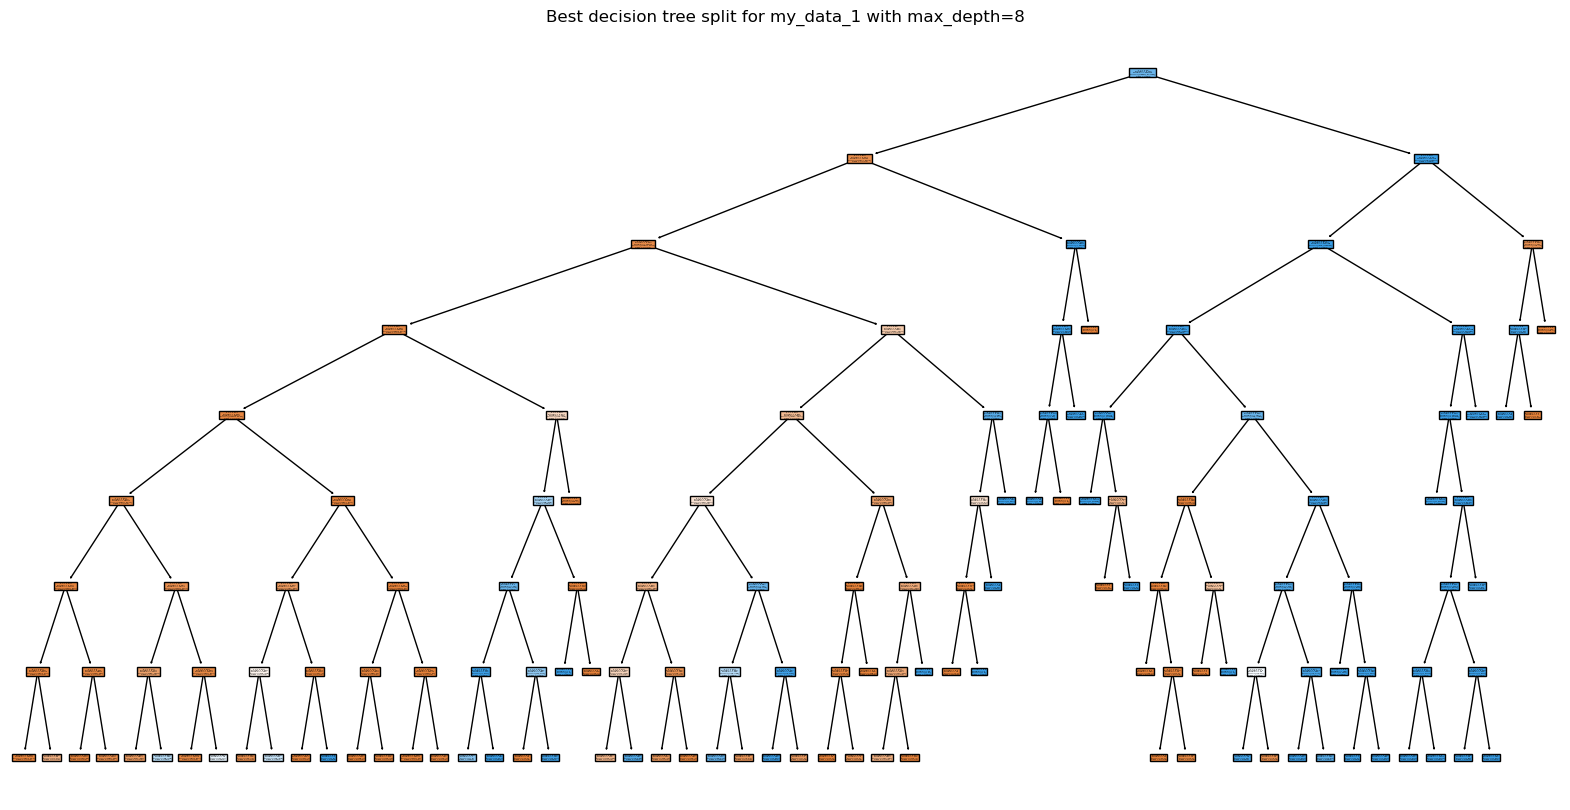

Classification report for my_data_2 with max_depth=4:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38977
           1       1.00      0.98      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609




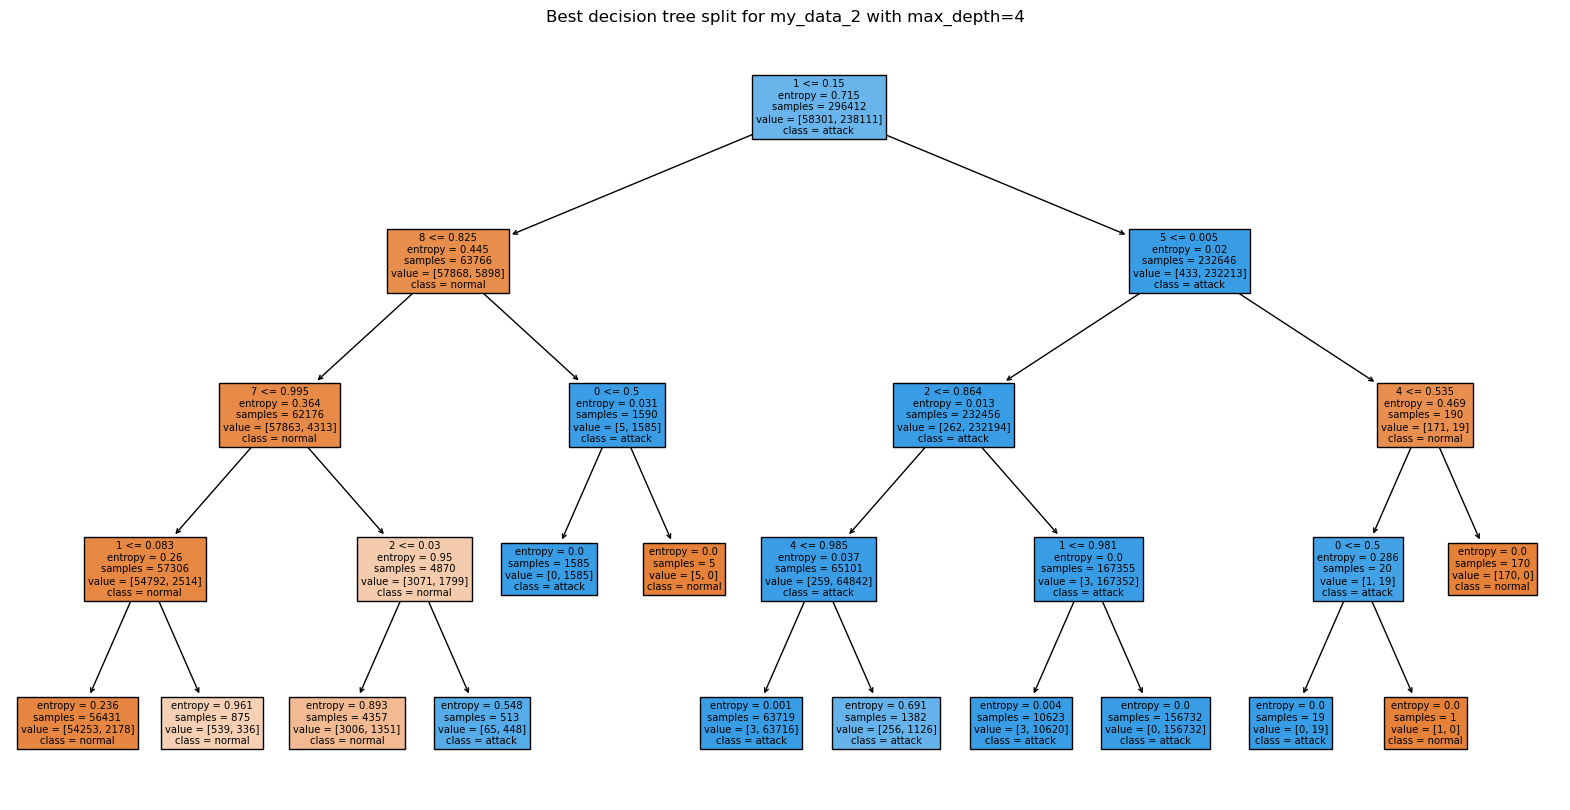

Classification report for my_data_2 with max_depth=6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609




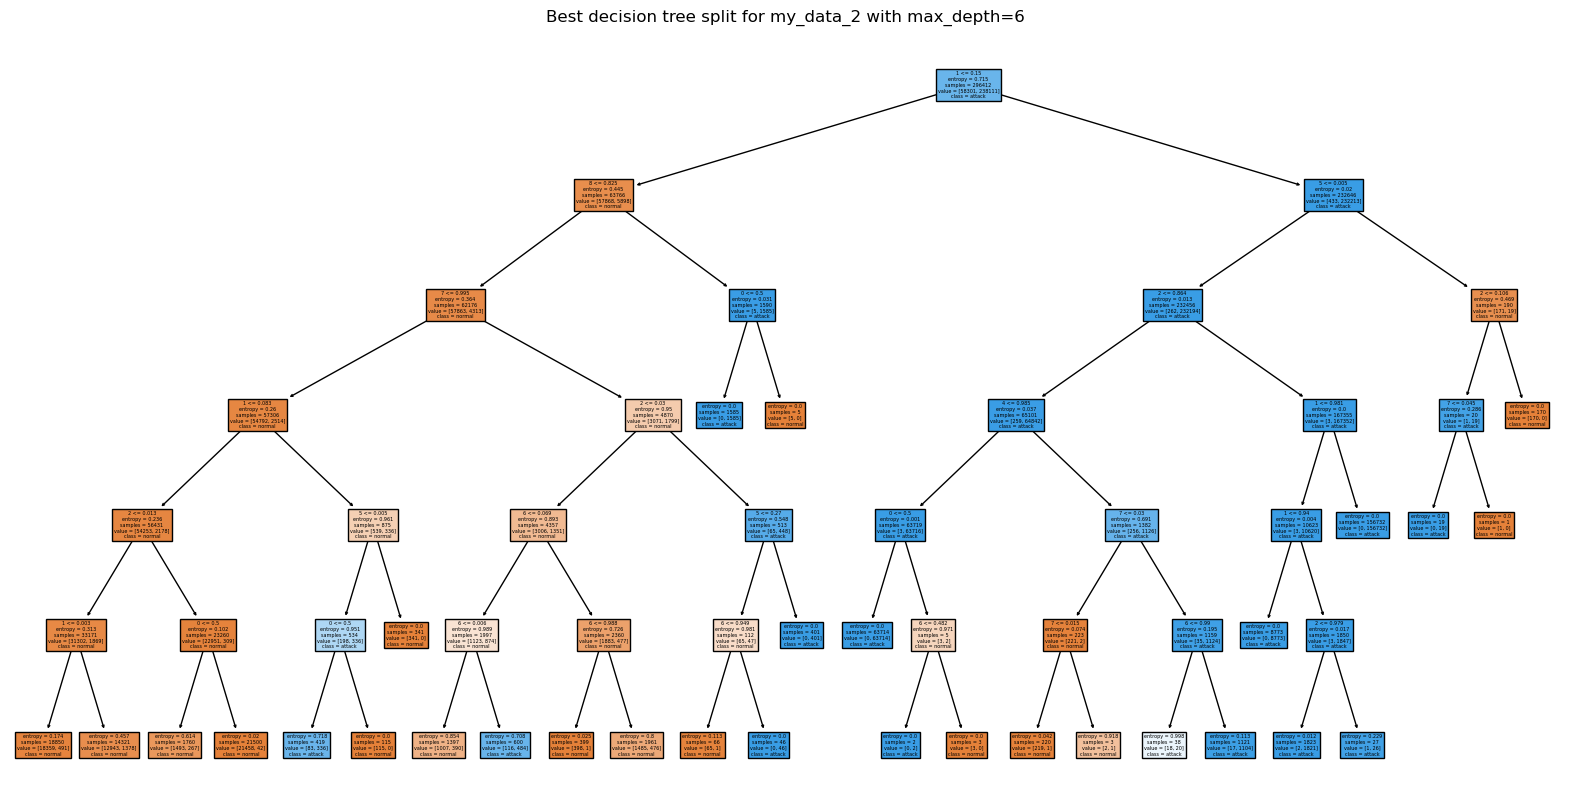

Classification report for my_data_2 with max_depth=8:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609




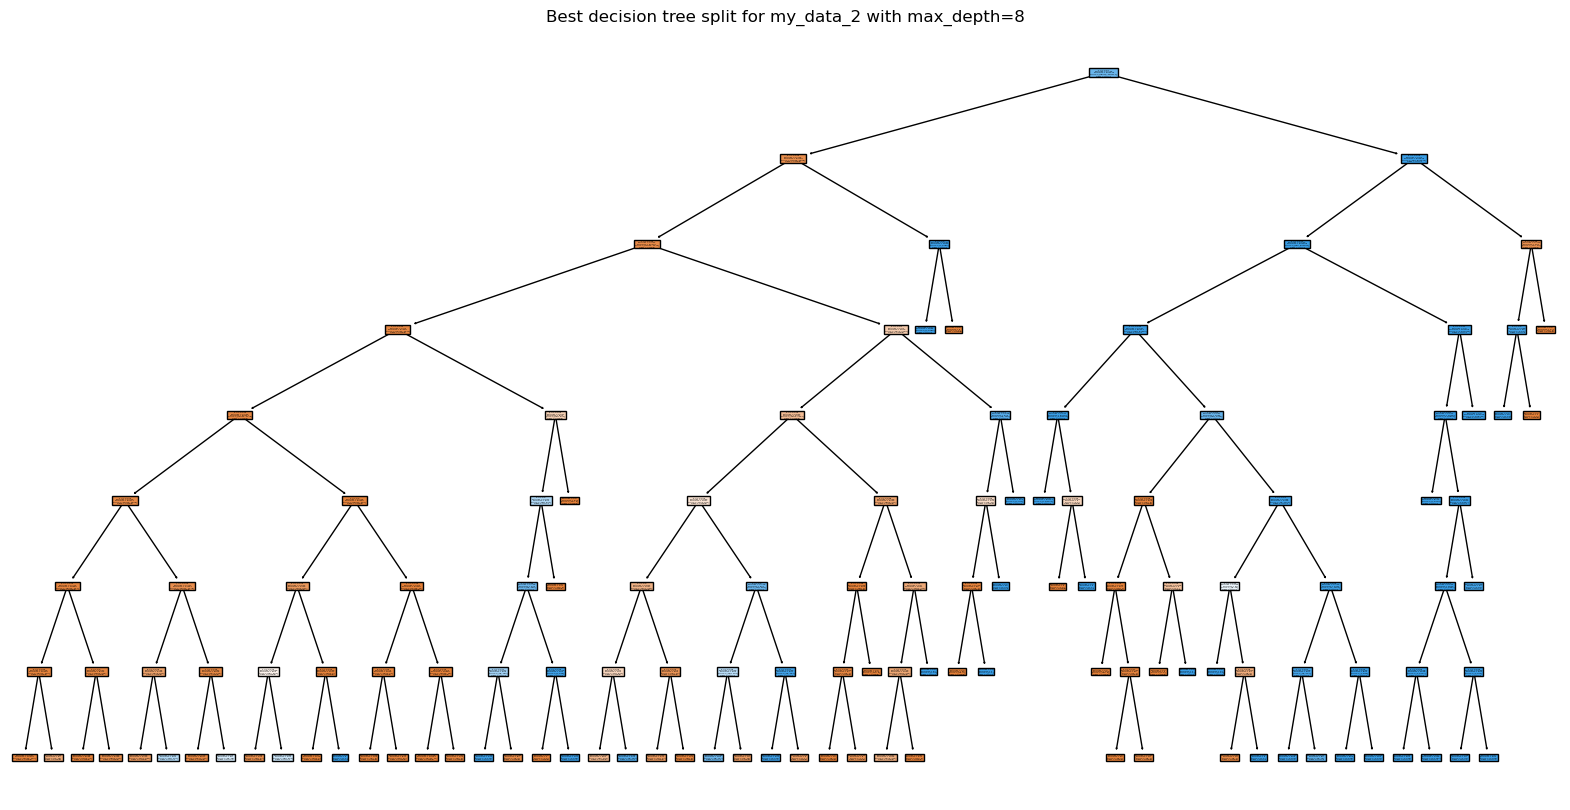

Classification report for my_data_3 with max_depth=4:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48650
           1       1.00      0.98      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011




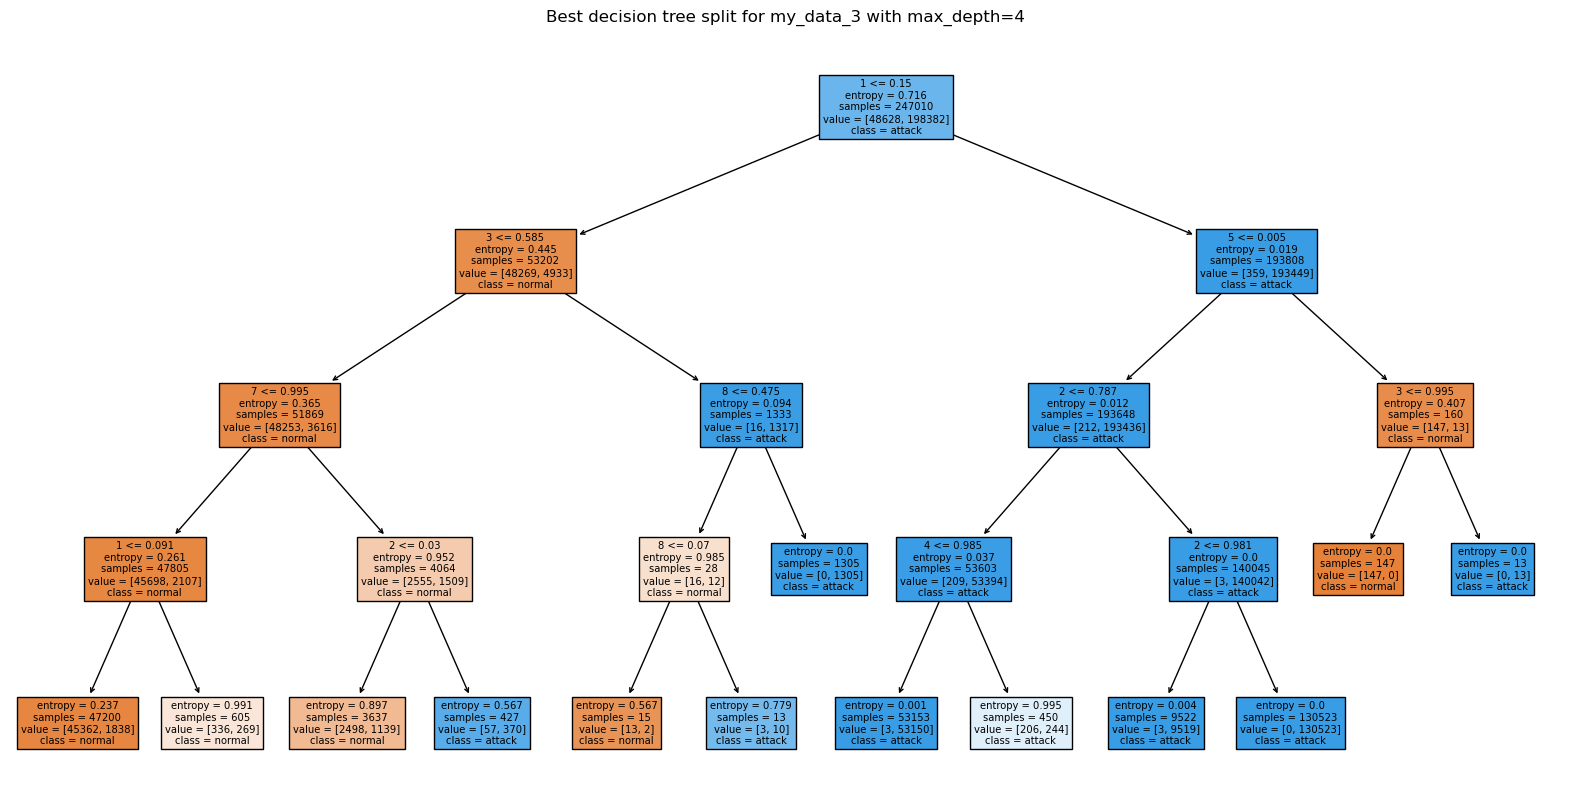

Classification report for my_data_3 with max_depth=6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011




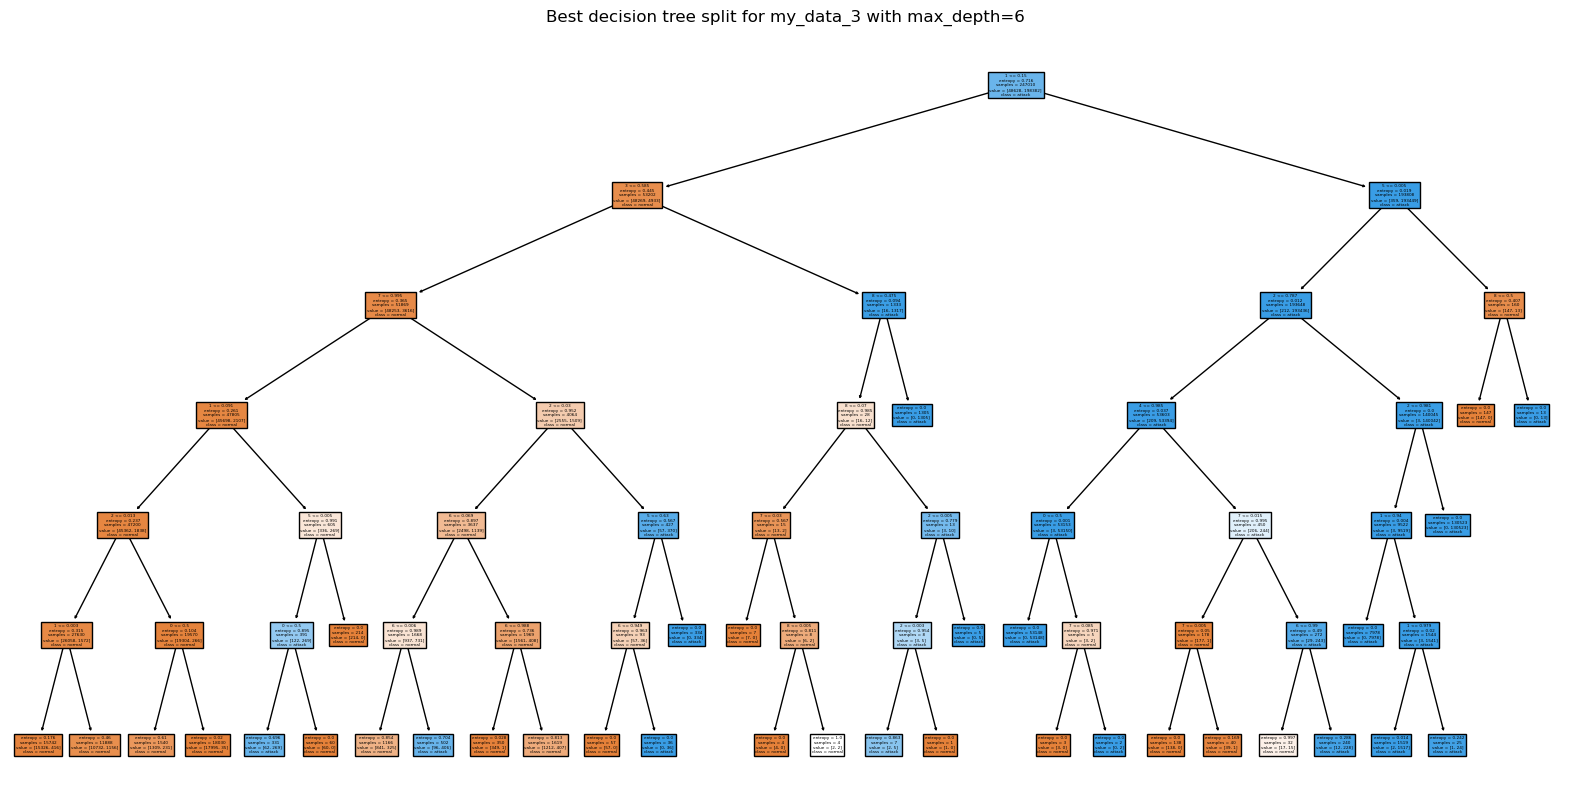

Classification report for my_data_3 with max_depth=8:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011




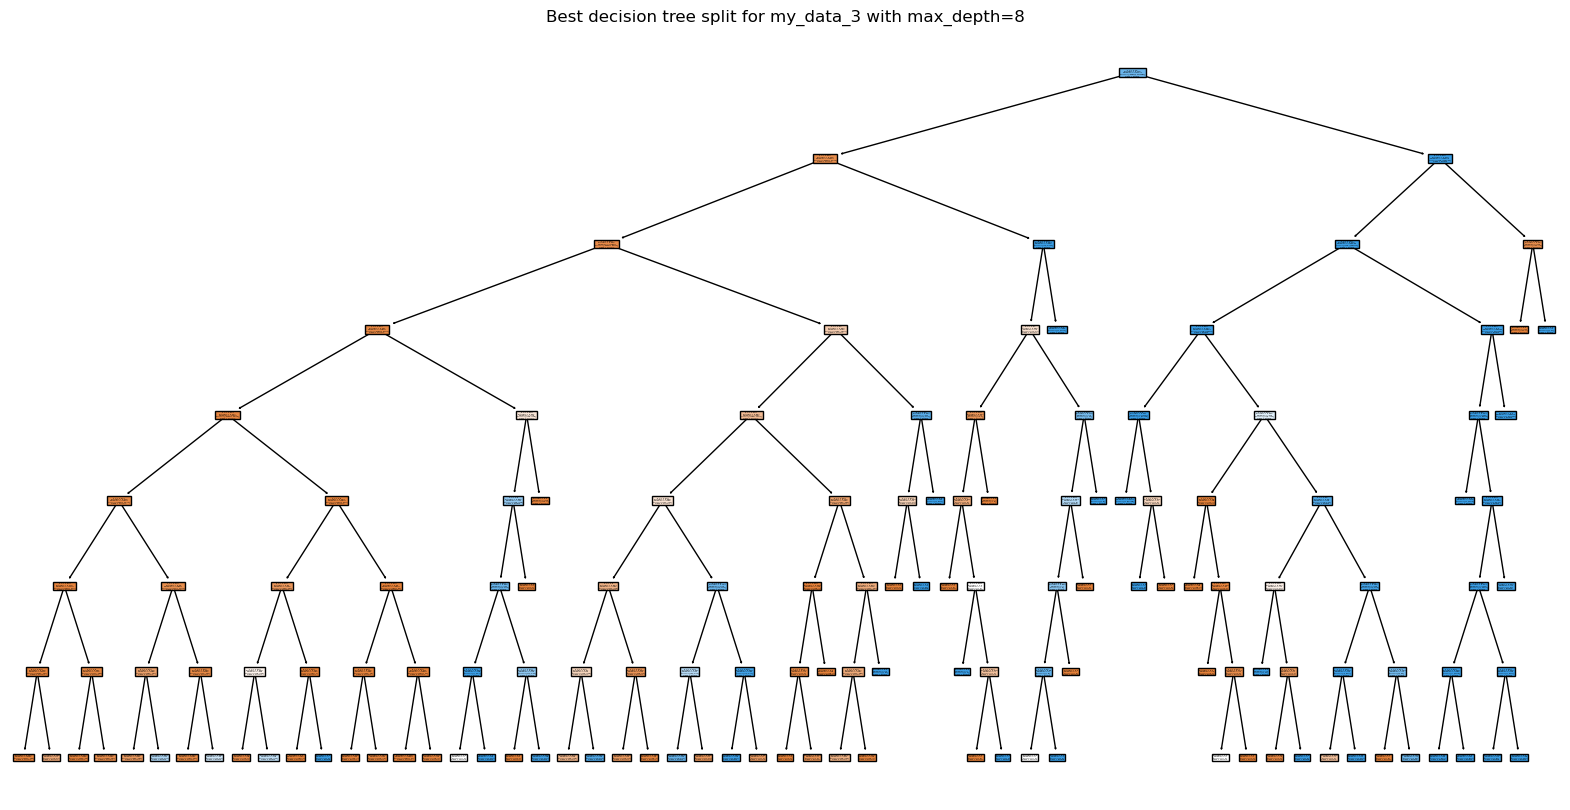

In [51]:
# Train and evaluate a decision tree model on each subset
for name, train, test in [("my_data_1", my_data_1_train, my_data_1_test),
                          ("my_data_2", my_data_2_train, my_data_2_test),
                          ("my_data_3", my_data_3_train, my_data_3_test)]:
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]
    
    # Train decision trees with different hyperparameters
    for max_depth in [4, 6, 8]:
        dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
        dt.fit(X_train, Y_train)
        
        # Evaluate the decision tree model
        Y_pred = dt.predict(X_test)
        report = classification_report(Y_test, Y_pred)
        print(f"Classification report for {name} with max_depth={max_depth}:\n{report}\n")
        
        # Visualize the best split of the decision tree
        plt.figure(figsize=(20, 10))
        plot_tree(dt, feature_names=X_train.columns, filled=True, class_names=["normal", "attack"], max_depth=max_depth)
        plt.title(f"Best decision tree split for {name} with max_depth={max_depth}")
        plt.show()

# d)

In [52]:
# Define the train-test ratios and max_depth values for each subset
train_sizes = [(0.7, 0.3), (0.6, 0.4), (0.5, 0.5)]
max_depths = [4, 6, 8]

# Iterate over the subsets and max_depth values
for i, (train_size, test_size) in enumerate(train_sizes, start=1):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_size, test_size=test_size, random_state=42)
    best_score = 0
    best_depth = 0

    # Iterate over the max_depth values to find the best one
    for max_depth in max_depths:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
        dt.fit(X_train, y_train)
        score = dt.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_depth = max_depth

    # Train the Decision Tree with the best max_depth on the entire dataset
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
    dt.fit(X, Y)

    # Compute the classification performance on the test set
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Print the classification performance for the current subset
    print(f"My Data {i} ({int(train_size*100)}% train, {int(test_size*100)}% test), Best max_depth = {best_depth}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}\n")

My Data 1 (70% train, 30% test), Best max_depth = 8:
Accuracy: 0.990148913344174
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:
[[ 28990    202]
 [  1258 117757]]

My Data 2 (60% train, 40% test), Best max_depth = 8:
Accuracy: 0.9903192668350126
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:
[[ 38706    271]
 [  1642 156990]]

My Data 3 (50% train, 50% tes

# e)

In [53]:
# Split my data 1 into train and test sets
train, test = train_test_split(my_data, test_size=0.3, random_state=42)
X_train = train.drop("target", axis=1)
Y_train = train["target"]
X_test = test.drop("target", axis=1)
Y_test = test["target"]

# Train a decision tree on my data 1
dt = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=42)
dt.fit(X_train, Y_train)

# Evaluate the decision tree on train and test data
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)
train_f1 = f1_score(Y_train, Y_train_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
print(f"Train F1 score: {train_f1}")
print(f"Test F1 score: {test_f1}\n")



Train F1 score: 0.9905172145876123
Test F1 score: 0.9901879035327712



In [54]:
# Mitigate overfitting using pre-pruning
dt_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_leaf=10, random_state=42)
dt_pruned.fit(X_train, Y_train)
Y_train_pred_pruned = dt_pruned.predict(X_train)
Y_test_pred_pruned = dt_pruned.predict(X_test)
train_f1_pruned = f1_score(Y_train, Y_train_pred_pruned, average='weighted')
test_f1_pruned = f1_score(Y_test, Y_test_pred_pruned, average='weighted')
print(f"Train F1 score after pre-pruning: {train_f1_pruned}")
print(f"Test F1 score after pre-pruning: {test_f1_pruned}\n")



Train F1 score after pre-pruning: 0.990442501732848
Test F1 score after pre-pruning: 0.9901073541721761



In [55]:
# Mitigate overfitting using post-pruning
path = dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
f1_scores_train, f1_scores_test = [], []
for ccp_alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=42, ccp_alpha=ccp_alpha)
    dt_pruned.fit(X_train, Y_train)
    Y_train_pred_pruned = dt_pruned.predict(X_train)
    Y_test_pred_pruned = dt_pruned.predict(X_test)
    train_f1_pruned = f1_score(Y_train, Y_train_pred_pruned, average='weighted')
    test_f1_pruned = f1_score(Y_test, Y_test_pred_pruned, average='weighted')
    f1_scores_train.append(train_f1_pruned)
    f1_scores_test.append(test_f1_pruned)
best_ccp_alpha = ccp_alphas[f1_scores_test.index(max(f1_scores_test))]
dt_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=42, ccp_alpha=best_ccp_alpha)
dt_pruned.fit(X_train, Y_train)
Y_train_pred_pruned = dt_pruned.predict(X_train)
Y_test_pred_pruned = dt_pruned.predict(X_test)
train_f1_pruned = f1_score(Y_train, Y_train_pred_pruned, average='weighted')
test_f1_pruned = f1_score(Y_test, Y_test_pred_pruned, average='weighted')
print(f"Train F1 score after post-pruning: {train_f1_pruned}")
print(f"Test F1 score after post-pruning: {test_f1_pruned}\n")



Train F1 score after post-pruning: 0.9905172145876123
Test F1 score after post-pruning: 0.9901879035327712



In [56]:
# Mitigate overfitting using k-fold cross-validation
f1_scores_train, f1_scores_test = [], []
for k in range(2, 11):
    dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=42)
    scores_train = cross_val_score(dt_cv, X_train, Y_train, cv=k)
    scores_test = cross_val_score(dt_cv, X_test, Y_test, cv=k)
    train_f1_cv = scores_train.mean()
    test_f1_cv = scores_test.mean()
    f1_scores_train.append(train_f1_cv)
    f1_scores_test.append(test_f1_cv)
best_k = f1_scores_test.index(max(f1_scores_test)) + 2
dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=42)
scores_train = cross_val_score(dt_cv, X_train, Y_train, cv=best_k)
scores_test = cross_val_score(dt_cv, X_test, Y_test, cv=best_k)
train_f1_cv = scores_train.mean()
test_f1_cv = scores_test.mean()
print(f"Train F1 score after k-fold cross-validation with k={best_k}: {train_f1_cv}")
print(f"Test F1 score after k-fold cross-validation with k={best_k}: {test_f1_cv}\n")

Train F1 score after k-fold cross-validation with k=4: 0.990373434917281
Test F1 score after k-fold cross-validation with k=4: 0.9900207158633356

